# Prática 5: circuitos RL e RC

### Circuito RC

In [168]:
import numpy as np
import matplotlib.pyplot as plt

dados_rc = np.loadtxt('dados/rc.dat').T
f, escVt, quadVt, escVr, quadVr, escdt, quaddt = dados_rc
Vt = escVt*quadVt/2
Vr = escVr*quadVr/2
dt = escdt*quaddt

R = 47.2
C = .222e-6

tabela = np.column_stack((f,Vt,Vr,dt))
print(tabela)

[[1.0106e+03 1.1000e+01 7.0000e-01 2.5000e-04]
 [3.2330e+03 1.0250e+01 2.0500e+00 8.5000e-05]
 [4.9760e+03 9.5000e+00 2.9000e+00 5.8000e-05]
 [7.1130e+03 8.5000e+00 3.6000e+00 4.4000e-05]
 [1.0150e+04 7.7500e+00 4.2000e+00 3.3000e-05]
 [1.3750e+04 7.0000e+00 4.6000e+00 2.6000e-05]
 [1.5150e+04 6.7500e+00 4.6000e+00 2.5000e-05]
 [1.6940e+04 6.5000e+00 4.8000e+00 2.2000e-05]
 [1.9940e+04 6.0000e+00 4.8000e+00 1.9500e-05]
 [3.0840e+04 5.7500e+00 5.0000e+00 1.3500e-05]
 [3.9630e+04 5.5000e+00 5.0000e+00 1.4000e-05]
 [5.0500e+04 5.4000e+00 5.2000e+00 1.0000e-05]]


In [169]:
# Análise da fase

omega = 2*np.pi*f
phi = -dt*omega  # fase em radianos
phi_teorico = np.arctan(-1/(omega*R*C))
tabela = np.column_stack((phi,phi_teorico,phi-phi_teorico))
print(tabela)

[[-1.58744677 -1.50435864 -0.08308813]
 [-1.72665074 -1.36107285 -0.36557789]
 [-1.81337755 -1.25420691 -0.55917064]
 [-1.96646107 -1.13282568 -0.83363539]
 [-2.10455292 -0.98169633 -1.12285659]
 [-2.24623875 -0.83507792 -1.41116083]
 [-2.37975644 -0.786679   -1.59307743]
 [-2.3416175  -0.73094837 -1.61066913]
 [-2.44309094 -0.65096497 -1.79212598]
 [-2.61594137 -0.45763378 -2.15830759]
 [-3.48603687 -0.36599842 -3.12003845]
 [-3.17300858 -0.2921626  -2.88084598]]


obtido: 15723.007446034466 esperado: 15188.859281177978


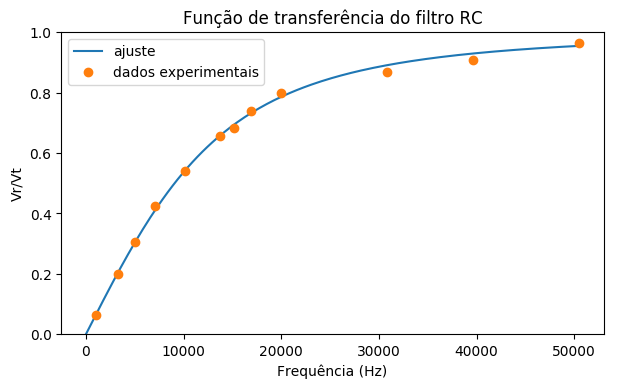

In [170]:
# Análise da curva característica

from scipy.optimize import curve_fit
modelo = lambda omega, omega_0: 1/np.sqrt(1+(omega_0/omega)**2)

ajuste_rc, mcov_rc = curve_fit(modelo, omega, Vr/Vt, [1/(R*C)])
omega_0 = ajuste_rc[0]
print('obtido:',omega_0/(2*np.pi),'esperado:',1/(2*np.pi*R*C))

plt.figure(figsize=(7,4),dpi=100)
lin_omega = np.linspace(0.1,omega[-1],200)
lin_f = lin_omega/(2*np.pi)
plt.plot(lin_f,modelo(lin_omega,omega_0),label='ajuste')
plt.plot(f,Vr/Vt,'o',label='dados experimentais')
plt.legend()
plt.title('Função de transferência do filtro RC')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Vr/Vt')
plt.ylim(0,1)
plt.show()

### Circuito RL

In [171]:
dados_rl = np.loadtxt('dados/rl.dat').T
f, escVt, quadVt, escVr, quadVr, escdt, quaddt = dados_rl
Vt = escVt*quadVt/2
Vr = escVr*quadVr/2
dt = escdt*quaddt

R = 47.2
r = 14.6
L = 46.1e-3

tabela = np.column_stack((f,Vt,Vr,dt))
print(tabela)

[[2.240e+01 6.000e+00 4.600e+00 2.300e-02]
 [5.020e+01 6.200e+00 4.600e+00 1.080e-02]
 [6.597e+01 4.500e+00 3.300e+00 7.200e-03]
 [8.347e+01 4.500e+00 3.200e+00 5.200e-03]
 [1.026e+02 6.400e+00 4.500e+00 5.500e-03]
 [1.328e+02 6.600e+00 4.400e+00 3.000e-03]
 [1.571e+02 6.800e+00 4.300e+00 3.800e-03]
 [1.702e+02 5.000e+00 3.000e+00 2.500e-03]
 [1.858e+02 5.100e+00 3.000e+00 2.150e-03]
 [2.000e+02 5.100e+00 2.950e+00 1.900e-03]]


In [172]:
# Análise da fase

omega = 2*np.pi*f
phi = dt*omega  # fase em radianos
phi_teorico = np.arctan(omega*L/R)
tabela = np.column_stack((f,phi,phi_teorico,phi-phi_teorico))
print(tabela)

[[2.24000000e+01 3.23709707e+00 1.36607158e-01 3.10048991e+00]
 [5.02000000e+01 3.40649175e+00 2.98839454e-01 3.10765229e+00]
 [6.59700000e+01 2.98441249e+00 3.84673307e-01 2.59973918e+00]
 [8.34700000e+01 2.72717888e+00 4.73387593e-01 2.25379129e+00]
 [1.02600000e+02 3.54560147e+00 5.61922599e-01 2.98367887e+00]
 [1.32800000e+02 2.50322103e+00 6.83797211e-01 1.81942382e+00]
 [1.57100000e+02 3.75093596e+00 7.67113935e-01 2.98382203e+00]
 [1.70200000e+02 2.67349535e+00 8.07148831e-01 1.86634652e+00]
 [1.85800000e+02 2.50994403e+00 8.50816555e-01 1.65912748e+00]
 [2.00000000e+02 2.38761042e+00 8.87118257e-01 1.50049216e+00]]


obtido: 227.56314992485318 esperado: 213.35738575008963


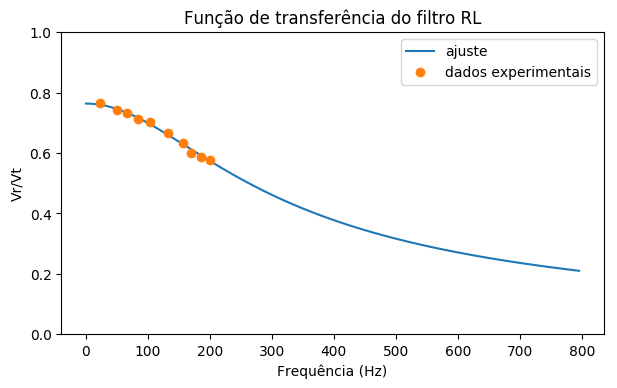

In [173]:
# Análise da curva característica

from scipy.optimize import curve_fit
modelo = lambda omega, omega_0: (R/(R+r))*1/np.sqrt(1+(omega/omega_0)**2)

ajuste_rl, mcov_rl = curve_fit(modelo, omega, Vr/Vt, [(R+r)/L])
omega_0 = ajuste_rl[0]
print('obtido:',omega_0/(2*np.pi),'esperado:',(R+r)/(2*np.pi*L))

plt.figure(figsize=(7,4),dpi=100)
lin_omega = np.linspace(0.01,5000,200)
lin_f = lin_omega/(2*np.pi)
plt.plot(lin_f,modelo(lin_omega,omega_0),label='ajuste')
plt.plot(f,Vr/Vt,'o',label='dados experimentais')
plt.legend()
plt.title('Função de transferência do filtro RL')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Vr/Vt')
plt.ylim(0,1)
plt.show()